In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path for data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "DOGEUSDT_5m_1h-pump05_190705_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2019-07-05 12:00:00,0.004490,0.004600,0.003760,0.004350,281690734.0,1841.0,131946467.0,572788.485474,0,...,NaN,0.881145,0.193103,0.468409,NaN,NaN,NaN,-0.063182,NaN,0.172414
1,2019-07-05 12:05:00,0.004340,0.004340,0.004000,0.004022,151285521.0,963.0,41885000.0,173783.101331,0,...,NaN,0.382859,0.084593,0.276861,NaN,NaN,NaN,-0.446279,NaN,0.172414
2,2019-07-05 12:10:00,0.004022,0.004069,0.003800,0.003870,182657540.0,1285.0,58720314.0,228693.805868,0,...,NaN,0.473791,0.069432,0.321478,NaN,NaN,NaN,-0.357045,NaN,0.172414
3,2019-07-05 12:15:00,0.003861,0.003940,0.003859,0.003929,73986015.0,535.0,43864831.0,171156.394506,0,...,NaN,1.456278,0.020591,0.592880,NaN,NaN,NaN,0.185760,NaN,0.172414
4,2019-07-05 12:20:00,0.003929,0.003964,0.003870,0.003877,67030342.0,399.0,27619614.0,108776.180726,0,...,NaN,0.700815,0.024249,0.412046,NaN,NaN,NaN,-0.175907,NaN,0.172414


In [2]:
from utils.model.model_manager import ModelManager

# Initialize manager
symbol = "DOGEUSDT"
start_date = "2019-07-05"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close       volume  num_trades  \
 0       0.004490  0.004600  0.003760  0.004350  281690734.0      1841.0   
 1       0.004340  0.004340  0.004000  0.004022  151285521.0       963.0   
 2       0.004022  0.004069  0.003800  0.003870  182657540.0      1285.0   
 3       0.003861  0.003940  0.003859  0.003929   73986015.0       535.0   
 4       0.003929  0.003964  0.003870  0.003877   67030342.0       399.0   
 ...          ...       ...       ...       ...          ...         ...   
 585893  0.332360  0.332450  0.332100  0.332230    1950566.0      1537.0   
 585894  0.332220  0.332350  0.332120  0.332270     449554.0       940.0   
 585895  0.332260  0.332260  0.331450  0.331710    2071478.0      2871.0   
 585896  0.331710  0.331830  0.331110  0.331440    2089804.0      2757.0   
 585897  0.331440  0.331600  0.331220  0.331530     884056.0      1661.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0         

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8157


np.float64(0.8157177172004001)

In [4]:
# Get and print metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8157
AUC-ROC Score: 0.9909

Overall Metrics:
Accuracy:  0.9711
Precision: 0.9705
Recall:    0.9711
F1-Score:  0.9681

Class 0 Metrics:
Precision: 0.9722
Recall:    0.9975
F1-Score:  0.9847

Class 1 Metrics:
Precision: 0.9468
Recall:    0.6075
F1-Score:  0.7401

Using raw probabilities
Classification threshold: 0.8157
{'accuracy': 0.9710681634070131, 'precision': 0.9704517656960113, 'recall': 0.9710681634070131, 'f1': 0.9680964649456604, 'auc_roc': np.float64(0.9909279844414363), 'optimal_threshold': np.float64(0.8157177172004001), 'precision_0': 0.9721718088324259, 'recall_0': 0.9975170701427685, 'f1_0': 0.9846813725490197, 'precision_1': 0.9468085106382979, 'recall_1': 0.6075085324232082, 'f1_1': 0.7401247401247402}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 2.84% of total SHAP value magnitude
Top 20 features explain 89.66% of total SHAP value magnitude
Ratio (Top/Bottom): 31.59x


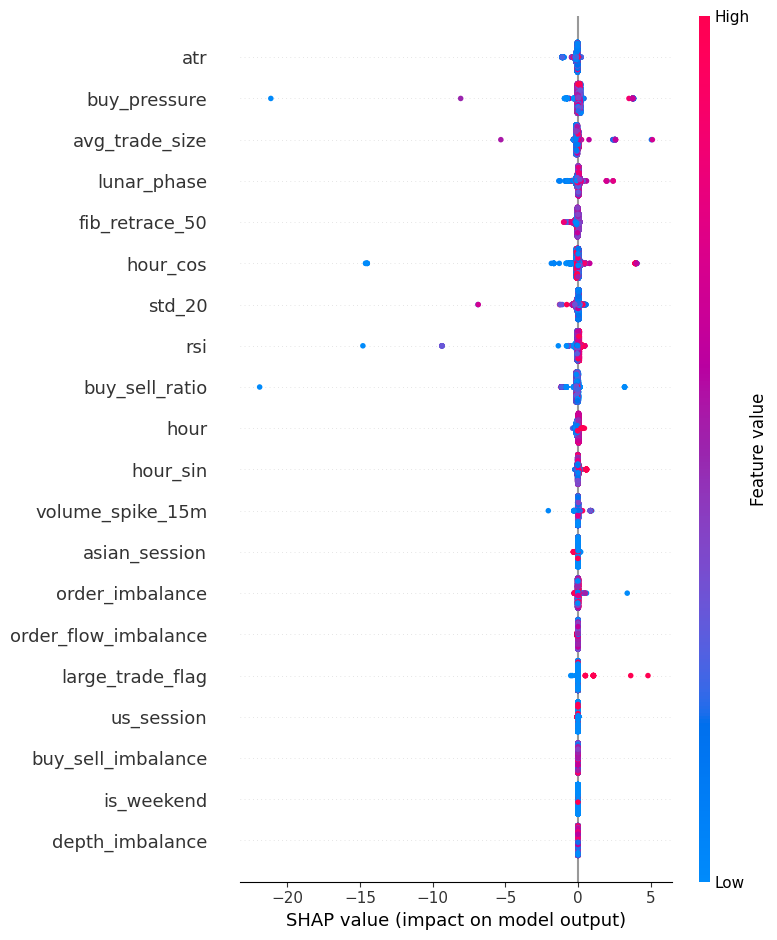

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 3.51% of total importance
Top 20 features explain 80.40% of total importance
Ratio (Top/Bottom): 22.89x


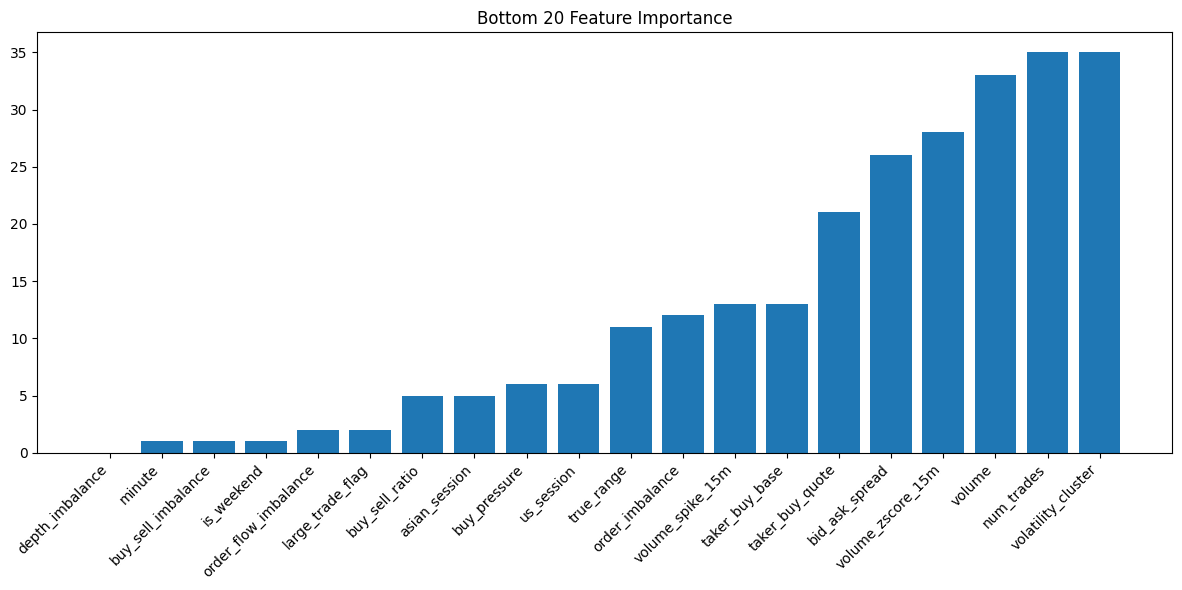

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()